#### Linear Regression with Tensorflow

In [1]:
import os, re, sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

import tensorflow as tf

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [17]:
a = tf.constant(3, dtype=tf.float32)
b = tf.constant(4, dtype=tf.float32)
total = a + b

print(f"Type of total = {type(total)}")

print(f"Total = {total}")

Type of total = <class 'tensorflow.python.framework.ops.Tensor'>
Total = Tensor("add:0", shape=(), dtype=float32)


In [36]:
def write_graph(d='.'):
    if not os.path.isdir(d):
        os.mkdir(d)
    writer = tf.summary.FileWriter(d)
    writer.add_graph(tf.get_default_graph())
    print(os.listdir(d))

In [23]:
sess = tf.Session()
print(sess.run(total))
print(sess.run(dict(a=a, b=b, total=total)))

7.0
{'a': 3.0, 'b': 4.0, 'total': 7.0}


In [24]:
v = tf.random_normal?

In [30]:
v = tf.random_normal(shape=(4,))
v1 = v + 1
v2 = v + 2
with tf.Session() as sess:
    for i in range(1, 3):
        for key, value in sess.run(dict(vr1=v, vr2=v, v1=v1, v2=v2)).items():
            print(f"Attempt {i}: {key} = {value}")
    print('v = ', sess.run(v))
    print('v = ', sess.run(v))
    print('v1 = ', sess.run(v1))
    print('v2 = ', sess.run(v2))

Attempt 1: vr1 = [-0.3357874   1.3572425  -0.60366017 -0.8272582 ]
Attempt 1: vr2 = [-0.3357874   1.3572425  -0.60366017 -0.8272582 ]
Attempt 1: v1 = [0.6642126  2.3572426  0.39633983 0.17274177]
Attempt 1: v2 = [1.6642126 3.3572426 1.3963399 1.1727418]
Attempt 2: vr1 = [ 0.42014349 -0.44265145  0.2734473  -2.554568  ]
Attempt 2: vr2 = [ 0.42014349 -0.44265145  0.2734473  -2.554568  ]
Attempt 2: v1 = [ 1.4201435   0.55734855  1.2734473  -1.554568  ]
Attempt 2: v2 = [ 2.4201436   1.5573485   2.2734473  -0.55456805]
v =  [ 2.390199   -0.25683048 -0.44665712  1.2564377 ]
v =  [ 0.08125228 -1.123355   -2.4101832  -1.0014453 ]
v1 =  [ 2.1826134   1.4118897   1.3327218  -0.25282145]
v2 =  [1.5955932 1.5531135 2.2321768 3.8040845]


#### Place holders

In [54]:
a = tf.placeholder(tf.float32, name="a")
b = tf.placeholder(tf.float32, name="b")
c = a + b
for t in (a, b, c):
    print(t, type(t))
with tf.Session() as sess:
    r = sess.run(dict(a=a, b=b, c=c), feed_dict={a: 5, b:10})
    print(f'Result = {r}')
    r = sess.run(dict(a=a, b=b, c=c), feed_dict={a: np.arange(5), b: np.arange(10,15)})
    print(f'Result = {r}')

Tensor("a_16:0", dtype=float32) <class 'tensorflow.python.framework.ops.Tensor'>
Tensor("b_16:0", dtype=float32) <class 'tensorflow.python.framework.ops.Tensor'>
Tensor("add_29:0", dtype=float32) <class 'tensorflow.python.framework.ops.Tensor'>
Result = {'a': array(5., dtype=float32), 'b': array(10., dtype=float32), 'c': 15.0}
Result = {'a': array([0., 1., 2., 3., 4.], dtype=float32), 'b': array([10., 11., 12., 13., 14.], dtype=float32), 'c': array([10., 12., 14., 16., 18.], dtype=float32)}


w = [2.9944675 1.9679569]


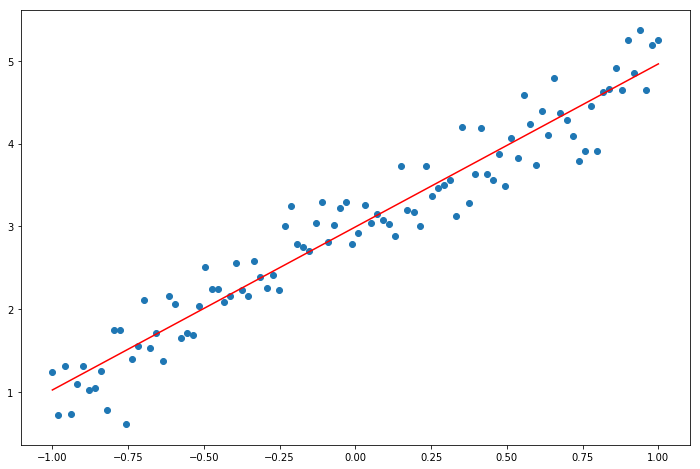

In [3]:
learning_rate = 0.01
epochs = 100

N = 100
X = np.linspace(-1, 1, N)
Y = X * 2 + np.random.randn(N) * 0.3 + 3

x = tf.placeholder(tf.float32, name="x")
y = tf.placeholder(tf.float32, name="y")
w = tf.Variable([0.1, 0.1], dtype=tf.float32, name="w")

def model(x, w):
    return w[0] + w[1] * x

cost = tf.pow(y - model(x, w), 2)
gdo = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = gdo.minimize(cost)
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    for epoch in range(epochs):
        for xi, yi in zip(X, Y):
            sess.run(train_op, feed_dict={x: xi, y: yi})
    w_final = sess.run(w)
    print(f'w = {w_final}')

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X, Y)
ax.plot(X, model(X, w_final), c='r')

w = [2.9917576 2.0089731]


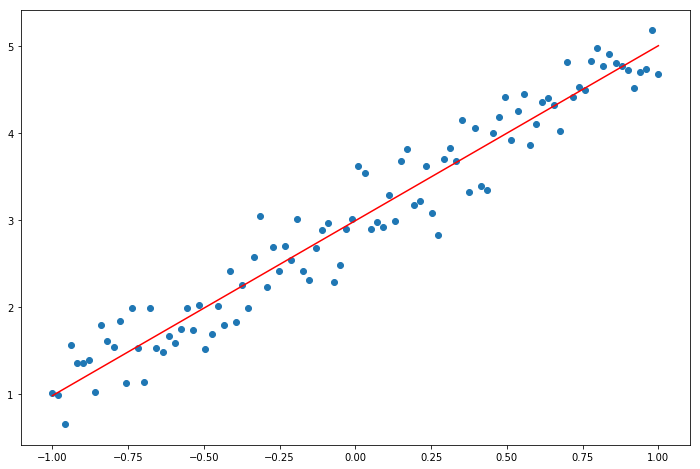

In [5]:
def linear_regression(X, Y, w, model, *, λ=0.0, learning_rate=0.01, epochs=100):
    x = tf.placeholder(tf.float32, name="x")
    y = tf.placeholder(tf.float32, name="y")
    w = tf.Variable(w, dtype=tf.float32, name="w")
    cost = tf.pow(y - model(x, w), 2) + 
    gdo = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = gdo.minimize(cost)
    init_op = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init_op)
        for epoch in range(epochs):
            for xi, yi in zip(X, Y):
                sess.run(train_op, feed_dict={x: xi, y: yi})
        w_final = sess.run(w)
        print(f'w = {w_final}')
    return w_final

def plot_regression(X, Y, w_final, model):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(X, Y)
    ax.plot(X, model(X, w_final), c='r')

N = 100
X = np.linspace(-1, 1, N)
Y = X * 2 + np.random.randn(N) * 0.3 + 3
w = [0.1, 0.1]

def model(x, w):
    return w[0] + w[1] * x

w_final = linear_regression(X, Y, w, model)
plot_regression(X, Y, w_final, model)


w = [ 2.9831557   0.08303569  1.0487627  -0.23512176  0.11439794 -0.08718982
 -0.07234953  0.04814953 -0.04508791  0.11554488]


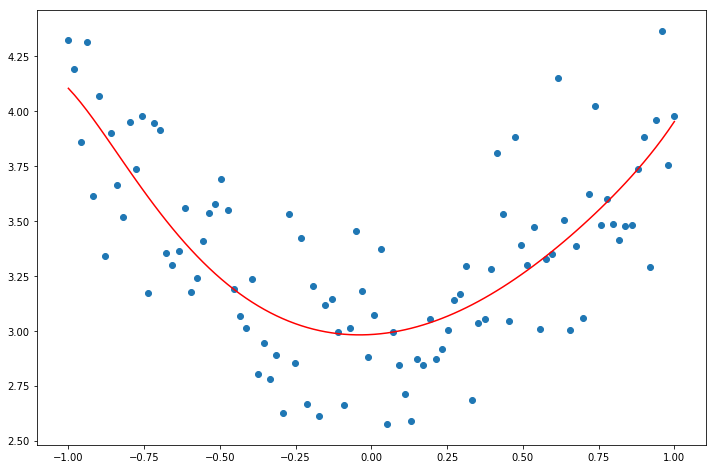

In [12]:
N = 100
DEGREE = 10
λ = 0.0

X = np.linspace(-1, 1, N)
Y = X ** 2 + np.random.randn(N) * 0.3 + 3
w = [0] * DEGREE

def model(x, w):
    return sum(w[i] * x ** i for i in range(DEGREE))

w_final = linear_regression(X, Y, w, model, λ)
plot_regression(X, Y, w_final, model)
